# <center>Comparison of Classifiers for Bioassay Datasets</center>


7743 Machine Learning and Data Science for Bioinformatics Final Project (Spring 2021)

- Lanqiu Yao & Zhiming He



# Introduction

<font size="3">

High-Throughput Screening (HTS) is a technique that is widely used for new drug development. The bioassay data is collected from the screening of a batch of chemical compounds, where the ability of chemical compounds to bind to the target compound is measured. Based on whether the given compound binds to the target or not, the outcome status is recorded as "Active" and "Inactive". An active bind is also known as a hit. The compound-screening library is then built with the biological compounds' binding results through HTS, which is needed for new drug development since the first step for drug discovery is usually to find the potential compounds that are able to bind the biological target. The screenings often contain two processes, which are known as the primary screening and the confirmatory screening. The confirmatory step helps reduce the false-positive rates. 

The PubChem repository is the main resource of the Bioassay Datasets provided by the National Center for Biotechnology Information. We selected the Bioassay dataset AID362, which is a screening Bioassay for 
Formylpeptide Receptor Ligand Binding University from the New Mexico Center for Molecular Discovery. 
The compounds were selected on the basis of preliminary virtual screening of approximately 480,000 drug-like small molecules from Chemical Diversity Laboratories.

We chose this data set since 

* (i) The data set selected a relatively small number of compounds: 3423 compounds in the training data set and 856 componts in the testing data set (shown in Table 1)
* (ii) The data set has a relatively high rate of active samples:

</font>
$$\frac{48}{3375 + 48}\approx 1.4 \%, \frac{12}{844 + 12} \approx 1.4 \%$$


<center>Table 1: Numbers of Inactive and Active Samples</center>

|  | Training Set | Testing Set |
| --- | --- | --- |
| Inactive |3375 | 844 |
| Active | 48 | 12 |


<font size="3">
However, the active rate is still low in this data set (e.g., 1.4$\%$). Therefore, the data is unbalanced, which is the major challenge for bioassay data analysis with machine learning approaches. 
    
The unbalanced problem often appears in machine learning studies. Due to the disparity of classes in the variables, the machine learning algorithms tend to categorize samples into the majority class and thus be inaccurate to predict the events. To deal with unbalanced data, one straightforward approach is resampling. Based on whether the sampling happens in the major group or minor group, the approach can be categorized into:

* Oversampling: Sample with replacement from the minority class and make the groups have the same sizes. Some algorithms such as SMOTE (Synthetic Minority Over-sampling Technique), Variational Autoencoders (VAE),  or MSMOTE (Modified Synthetic Minority Over-sampling Technique), etc are available for oversampling purpose. 

* Undersampling: Randomly sample from the majority class without replacement. The sample size is the same as the minority class. The weakness of this approach is that it only utilizes a small part of the data from the majority and thus may lose important information. 

Besides, applying appropriate metrics is necessary for unbalanced data analysis. From the confusion matrix, instead of calculating the accuracy score, we could also calculate the sensitivity and specificity, as well as precision and recall F1-scores. The Area under the ROC Curve (AUC) is also a good metric for unbalanced data. 

In this project, we applied both oversampling and undersampling approaches and the machine learning methods covered in class on the bioassay dataset to study whether we could have a powerful classification on this dataset.  
</font>

![alt text](resampling.png "Resampling methods")

# Methods

### Data Exploration

<font size="3">
There are 3423 samples in the training dataset and 856 samples in the test dataset. Each dataset contains about $1.4\%$ active samples and all the others are inactive. 
For each sample, 144 features as well as its outcome label were collected. Most of the features only contain 0s. Therefore, we first applied the meta estimator that fits a number of randomized decision trees (e.g. extra-trees) to select the top 30 features that are associated with the outcome labels the most. Following figure shows top 50 larger features and we can find that the top 30 features weight more important than the rests.
<font>

![alt text](top50features.png "Top 50 important features")

<font size="3">    
To reduce the variable dimension, we applied PCA and selected the first 6 PCs that could explain 80$\%$ of the  variance. The plots of PCA results are shown in figures below. We can find that the 1st PCA plays the most important role than the others, it weights almost 3 times higher than the 2nd PC. Another observation is the unblanced data from 2D PCA,in which there a lot of inactive number than the active number
</font>

![alt text](PCA_var.png "Top 6 PCA")

![alt text](2_pca_before_resampling.png "2D PCA before resampling")

<font size="3">    
The oversampling (Upper figure) with the SMOTE algorithm and the undersampling methods (lower figure) were conducted on the training data to make it balanced.
</font>

![alt text](2_pca_oversampling.png "2D PCA before resampling")

![alt text](2_pca_undersampling.png "2D PCA before resampling")

### Machine Learning Approaches

<font size="3">

We applied 

* [SVM](#SVM)

* [KNN](#KNN)

* [Logistic Regression](#LogisticRegression)

* [Decision Tree](#DecisionTrees) 

* [Random Forest](#RandomForest)

* [Native Bayes](#NativeBayes)

Each method was applied on both oversampling and undersampling training data set. The sensitivity, specificity, false positive rate, false negative rate, false discovery rate, total accuracy score, AUC, as well as precision and F1-scores for active samples and inactive samples were calculated
</font>

![alt text](approaches.png "Machine Learning Approaches")

# Results

The confusion matrice and the ROC curves for each model could be found here [Results Summary](#ResultsSummary), Please click it to view all the 12 results of different classifier models with Oversampling or Undersampling traing data, and the prediction with test data as well. Here is a example of the confusion matrice and the ROC curves of the Oversampling-SVM:

#### <center>Example: Oversampling-SVM<center>

![alt text](oversampling_svm.png "Oversampling SVM")

<br>

#### <center>Table 1: OverSampling--model Performance Evaluation</center>

In [117]:
table1

,Method,Sensitivity,Specificity,False positive rate,False negative rate,False Discovery rate,Overall accuracy,ROC
0,SVM,0.227273,0.991607,0.008393,0.772727,0.583333,0.971963,0.705667
1,KNN,0.172414,0.991536,0.008464,0.827586,0.583333,0.963785,0.694115
2,Logistic Regression,0.028037,0.994393,0.005607,0.971963,0.250000,0.632009,0.746840
3,Decision Tree,0.045714,0.994126,0.005874,0.954286,0.333333,0.800234,0.743730
4,Random Forest,0.100000,0.991315,0.008685,0.900000,0.583333,0.939252,0.834321
5,Naive Bayes,0.024194,0.993802,0.006198,0.975806,0.250000,0.572430,0.705667


#### <center>Table 2a: Oversampling-Inactive Samples </center>

In [119]:
table11

,Method,precision,f1-score
0,SVM,0.991607,0.985697
0,KNN,0.991536,0.981448
0,Logistic Regression,0.994393,0.771574
0,Decision Tree,0.994126,0.887869
0,Random Forest,0.991315,0.968485
0,Naive Bayes,0.993802,0.724398


#### <center>Table 2b: Oversampling-Active Samples</center>

In [120]:
table12

,Method,precision,f1-score
1,SVM,0.227273,0.294118
1,KNN,0.172414,0.243902
1,Logistic Regression,0.028037,0.054054
1,Decision Tree,0.045714,0.085561
1,Random Forest,0.100000,0.161290
1,Naive Bayes,0.024194,0.046875


#### <center>Table 3: UnderSampling--model Performance Evaluation</center>

In [118]:
table3

,Method,Sensitivity,Specificity,False positive rate,False negative rate,False Discovery rate,Overall accuracy,ROC
0,SVM,0.032520,1.000000,0.000000,0.967480,0.000000,0.582944,0.828495
1,KNN,0.043636,1.000000,0.000000,0.956364,0.000000,0.692757,0.863349
2,Logistic Regression,0.023499,0.993658,0.006342,0.976501,0.250000,0.559579,0.735288
3,Decision Tree,0.031008,1.000000,0.000000,0.968992,0.000000,0.561916,0.829532
4,Random Forest,0.026110,0.995772,0.004228,0.973890,0.166667,0.561916,0.743237
5,Naive Bayes,0.023529,0.992248,0.007752,0.976471,0.333333,0.607477,0.720577


#### <center>Table 4a: UnderSampling-Inactive Samples</center>

In [121]:
table21

,Method,precision,f1-score
0,SVM,1.000000,0.731781
0,KNN,1.000000,0.815439
0,Logistic Regression,0.993658,0.713743
0,Decision Tree,1.000000,0.714395
0,Random Forest,0.995772,0.715262
0,Naive Bayes,0.992248,0.752941


#### <center>Table 4b: UnderSampling-Active Samples</center>

In [122]:
table22

,Method,precision,f1-score
1,SVM,0.032520,0.062992
1,KNN,0.043636,0.083624
1,Logistic Regression,0.023499,0.045570
1,Decision Tree,0.031008,0.060150
1,Random Forest,0.026110,0.050633
1,Naive Bayes,0.023529,0.045455


<br>

# Conclusion and Discussion:

* Unbalanced data is a major problem for handling this kind of datasets. Oversampling method seems more useful for improving classifier’s performance. We can compare the f1-scores of both resampling methods for their predicting inactive data or active data. Averagely, the fi-score are higher in Oversampling-inactive than that in Undersampling-inactive, and also as same as in Oversampling-active vs that in Undersampling-active.   
* Another way to compare the model performance is to examine their "Overall accuracy" value. We can find that with Oversampling method, the SVM, KNN, and Random forest models gave us the highest accuracy for predicting “Inactive and Active” results and their values are around 93 to 97%. Meanwhile, the overall accuracy with UnderSampling methodare all around 56%-69%.
* Overfitting might be another concern, especially for Oversampling-Inactive or without Resampling-Inactive. 
* Finally, no classifier seems good model to predict “Active”, because their Precision values are all very low. 


<br>

# Codes and Results

Load all the required libraries

In [2]:
import numpy as np
import pandas as pd
import random
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.svm import SVC
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.utils import resample
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

from sklearn.metrics import recall_score, precision_score, classification_report,accuracy_score,confusion_matrix, roc_curve, auc, roc_curve,accuracy_score,plot_confusion_matrix



Load the training and testing datasets of study AID362. 

In [3]:
Train_Data = pd.read_csv("AID362red_train.csv")
Test_Data = pd.read_csv("AID362red_test.csv")

Add numerical labels and drop categorical column

In [4]:
def outcome_to_numeric(x):
    if x=='Inactive':
        return 0
    if x=='Active':
        return 1

In [5]:
Train_Data['label'] = Train_Data['Outcome'].apply(outcome_to_numeric)
Test_Data['label'] = Test_Data['Outcome'].apply(outcome_to_numeric)
Train_Data=Train_Data.drop('Outcome', axis=1)
Test_Data=Test_Data.drop('Outcome', axis=1)

There is no missing data

In [6]:
Train_Data.isna().sum().max(), Test_Data.isna().sum().max()

(0, 0)

However, these data sets contain many 0s as we mentioned before

In [7]:
Train_Data.head()

,NEG_01_NEG,NEG_03_NEG,NEG_04_NEG,NEG_05_NEG,NEG_06_NEG,NEG_07_NEG,NEG_03_POS,NEG_04_POS,NEG_05_POS,NEG_06_POS,...,WBN_LP_H_1.00,XLogP,PSA,NumRot,NumHBA,NumHBD,MW,BBB,BadGroup,label
0,0,0,0,0,0,0,0,0,0,0,...,3.7730,2.704,119.85,4,6,0,424.569,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,3.5674,2.605,94.17,11,8,1,484.593,0,1,1
2,0,0,0,0,0,0,0,0,0,0,...,3.9847,2.780,77.76,7,5,1,333.384,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,3.6643,5.239,119.36,9,8,2,562.659,0,1,1
4,0,0,0,0,0,0,0,0,0,0,...,3.6613,4.024,76.07,6,6,1,409.482,0,1,1


Split datasets into feature and label dataframes

In [8]:
x_train = Train_Data.drop('label', axis=1)
y_train = Train_Data['label']
x_test = Test_Data.drop('label', axis=1)
y_test = Test_Data['label']

Therefore, we select the top 30 important features

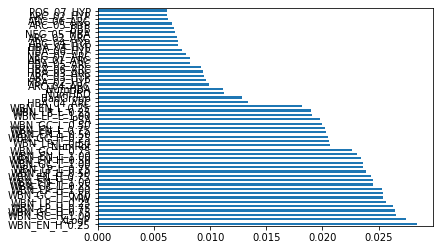

In [9]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
%matplotlib inline

model = ExtraTreesClassifier()
model.fit(x_train, y_train)

feat_importances = pd.Series(model.feature_importances_, index=x_train.columns)
feat_importances.nlargest(50).plot(kind='barh')
plt.show()

In [10]:
X_train= x_train[feat_importances.nlargest(30).index]
X_test= x_test[feat_importances.nlargest(30).index]

In [11]:
X_train = pd.DataFrame(X_train)

The data is very unbalanced

In [12]:
df = pd.concat([pd.DataFrame(Train_Data.groupby('label').size()).reset_index(drop=True),
                  pd.DataFrame(Test_Data.groupby('label').size())], axis=1)
df.columns = ['Train','Test']
df.index = ['Inactive','Active']
df

,Train,Test
Inactive,3375,844
Active,48,12


In [13]:
df

,Train,Test
Inactive,3375,844
Active,48,12


In [14]:
print('Only',round((48+12)/(3375+844)*100,3) ,'% of the data are active samples')

Only 1.422 % of the data are active samples


Features Standardization

In [15]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

### Dimentionality reduction using Principal Component Analysis(PCA)


In [16]:
idea_pca = PCA(0.8)
X_train_pca = idea_pca.fit_transform(X_train)
X_train_pca.shape

(3423, 6)

In [17]:
X_test_pca=idea_pca.transform(X_test)

In [18]:
principalDf = pd.DataFrame(data = X_train_pca,
                           columns = ['pc' + str(i) for i in range(1,X_train_pca.shape[1] +1)])
pcaDf = pd.concat([principalDf, y_train], axis = 1)

In [19]:
X_test_pca=idea_pca.transform(X_test)
cov_mat=idea_pca.get_covariance()
k = len(idea_pca.explained_variance_)
tot = sum(idea_pca.explained_variance_)
var_exp = [(i/tot) for i in sorted(idea_pca.explained_variance_, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

#### PCA explained variance plot

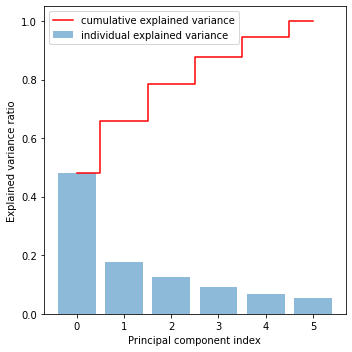

In [20]:
plt.figure(figsize=(5,5))
plt.bar(range(k), var_exp, alpha=0.5, align="center",label="individual explained variance")
plt.step(range(k), cum_var_exp, where="mid",label="cumulative explained variance", color="Red")
plt.ylabel("Explained variance ratio")
plt.xlabel("Principal component index")
plt.legend(loc="best")
plt.tight_layout()

#### First 2 PCs plot

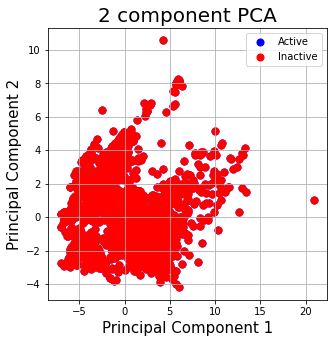

In [21]:
fig = plt.figure(figsize = (5,5))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Active', 'Inactive']
colors = ['b', 'r']
for target, color in zip(targets,colors):
    ax.scatter(X_train_pca[:, 0], X_train_pca[:, 1]
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

#### First 3 PC plots, 3D plot

<ipython-input-22-57d55012a8c4>:9: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, elev=-150, azim=110,)


[Text(-8.0, 0, ''),
 Text(-6.0, 0, ''),
 Text(-4.0, 0, ''),
 Text(-2.0, 0, ''),
 Text(0.0, 0, ''),
 Text(2.0, 0, ''),
 Text(4.0, 0, ''),
 Text(6.0, 0, ''),
 Text(8.0, 0, ''),
 Text(10.0, 0, '')]

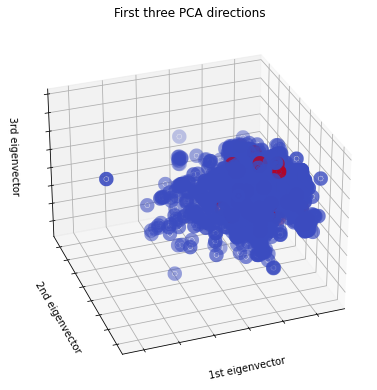

In [22]:
from mpl_toolkits.mplot3d import Axes3D

pca3 = PCA(n_components=3).fit(X_train)
X_train_reduced = pca3.transform(X_train)

plt.figure(figsize=(5,5))
plt.clf()
fig = plt.figure(1)
ax = Axes3D(fig, elev=-150, azim=110,)
ax.scatter(X_train_reduced[:, 0], X_train_reduced[:, 1], X_train_reduced[:, 2], c = y_train, cmap='coolwarm', linewidths=10)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

### Resample the datasets using SMOTE-Oversampling 

In [23]:
oversample = SMOTE()
X_train_ov, y_train_ov = oversample.fit_resample(X_train_pca,y_train)
print("After Over(Up)sampling:-",Counter(y_train_ov))

After Over(Up)sampling:- Counter({1: 3375, 0: 3375})


<Figure size 360x360 with 0 Axes>

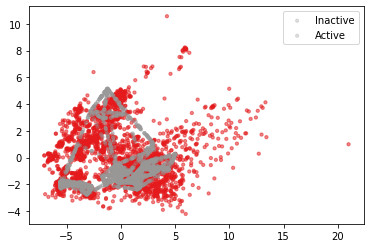

In [24]:
plt.figure(figsize=(5,5)) 
fig, ax = plt.subplots()
for color in ['Inactive', 'Active']:
    ax.scatter(X_train_ov[:, 0], X_train_ov[:, 1],
               c=y_train_ov, s=10, label=color,
               alpha=0.3, cmap='Set1')

ax.legend()
plt.show()

### Resample the datasets using Undersampling

In [25]:
undersample = RandomUnderSampler(random_state=42)
X_train_ud, y_train_ud= undersample.fit_resample(X_train_pca,y_train)
print("After Over(Up)sampling:-", Counter(y_train_ud))

After Over(Up)sampling:- Counter({0: 48, 1: 48})


<Figure size 360x360 with 0 Axes>

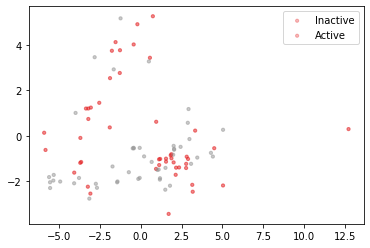

In [26]:
plt.figure(figsize=(5,5)) 
fig, ax = plt.subplots()
for color in ['Inactive', 'Active']:
    ax.scatter(X_train_ud[:, 0], X_train_ud[:, 1],
               c=y_train_ud, s=10, label=color,
               alpha=0.3, cmap='Set1')

ax.legend()
plt.show()

# Analysis 

#### With oversampling data

* SVM
* KNN
* Logistic Regression
* Decision Trees
* Random Forest
* Naive Bayes

#### With undersampling data

* SVM
* KNN
* Logistic Regression
* Decision Trees
* Random Forest
* Naive Bayes

In [26]:
def resultsummary(confusion_matrix):
    FP = confusion_matrix[0,1]
    FN = confusion_matrix[1,0]
    TP = confusion_matrix[1,1]
    TN = confusion_matrix[0,0]

    # Sensitivity, hit rate, recall, or true positive rate
    TPR = TP/(TP+FN)
    # Specificity or true negative rate
    TNR = TN/(TN+FP) 
    # False positive rate
    FPR = FP/(FP+TN)
    # False negative rate
    FNR = FN/(TP+FN)
    # False discovery rate
    FDR = FP/(TP+FP)

    # Overall accuracy
    ACC = (TP+TN)/(TP+FP+FN+TN)
    
    print('Sensitivity', round(TPR,3))
    print('Specificity ', round(TNR,3))
    print('False positive rate', round(FPR,3))
    print('False negative rate', round(FNR,3))
    print('Overall accuracy', round(ACC,3))
    
    return(TPR, TNR, FPR, FNR, FDR, ACC)

## Oversampling

### SVM

#### 1.1 SVM 

In [27]:
svc_params = [{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
              {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 
               'gamma': [0.1, 0.3, 0.5, 0.7, 0.9]}]
search = GridSearchCV(SVC(), svc_params, n_jobs=-1, verbose=1)
search.fit(X_train_ov, y_train_ov)

#to get best score
best_accuracy = search.best_score_ 
#to get best parameters
best_parameters = search.best_params_ 
# select best svc
best_svc = search.best_estimator_
best_svc

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 14.9min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed: 17.8min finished


SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.9, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

#### Prediction Results

In [28]:
best_parameters

{'C': 100, 'gamma': 0.9, 'kernel': 'rbf'}

In [29]:
svc_model = SVC(C = best_parameters['C'],
                gamma = best_parameters['gamma'], 
                kernel = 'rbf', probability=True)
svc_model.fit(X_train_ov, y_train_ov)
prediction=svc_model.predict(X_test_pca)

In [30]:
svm_pred = prediction

In [31]:
svm_table = confusion_matrix(prediction, y_test)
svm_table1 = resultsummary(svm_table)
svm_table2 = classification_report(y_test,prediction, output_dict=True)
svm_table2 = pd.DataFrame(svm_table2).transpose()
svm_prob= svc_model.predict_proba(X_test_pca)[:,1]

Sensitivity 0.227
Specificity  0.992
False positive rate 0.008
False negative rate 0.773
Overall accuracy 0.972


### KNN

#### 1.2 KNN with grid search 

In [32]:
knn_param = {
    "n_neighbors": [i for i in range(1,30,5)],
    "weights": ["uniform", "distance"],
    "algorithm": ["ball_tree", "kd_tree", "brute"],
    "leaf_size": [1, 10, 30],
    "p": [1,2]
}
search = GridSearchCV(KNeighborsClassifier(), 
                      knn_param, n_jobs=-1, verbose=1)
search.fit(X_train_ov, y_train_ov)

#to get best score
best_accuracy = search.best_score_ 
#to get best parameters
best_parameters = search.best_params_
# select best svc
best_knn = search.best_estimator_
best_knn

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 388 tasks      | elapsed:   18.2s
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:   58.1s finished


KNeighborsClassifier(algorithm='ball_tree', leaf_size=1, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

#### Prediction Results

In [33]:
best_parameters

{'algorithm': 'ball_tree',
 'leaf_size': 1,
 'n_neighbors': 1,
 'p': 2,
 'weights': 'uniform'}

In [34]:
knn_model = KNeighborsClassifier(
    algorithm = best_parameters['algorithm'],
    leaf_size = best_parameters['leaf_size'], 
    n_neighbors = best_parameters['n_neighbors'],
    p = best_parameters['p'],
    weights = best_parameters['weights'])
knn_model.fit(X_train_ov,y_train_ov)
prediction=knn_model.predict(X_test_pca)

In [35]:
knn_pred = prediction

In [36]:
knn_table = confusion_matrix(prediction, y_test)
knn_table1 = resultsummary(knn_table)
knn_table2 = classification_report(y_test,
                                   prediction, 
                                   output_dict=True)
knn_table2 = pd.DataFrame(knn_table2).transpose()
knn_prob= knn_model.predict_proba(X_test_pca)[:,1]

Sensitivity 0.172
Specificity  0.992
False positive rate 0.008
False negative rate 0.828
Overall accuracy 0.964


### LogisticRegression

#### 1.3 Logistic regression

In [37]:
log_grid = {'C': [1e-03, 1e-2, 1e-1, 1, 10], 
                 'penalty': ['l1', 'l2']}
log_model = GridSearchCV(
    estimator = LogisticRegression(solver='liblinear'), 
    param_grid = log_grid, 
    cv = 3,
    scoring = 'accuracy')
log_model.fit(X_train_ov, y_train_ov)
#to get best score
best_accuracy = log_model.best_score_ 
#to get best parameters
best_parameters = log_model.best_params_ 
# select best svc
best_lr = log_model.best_estimator_
best_lr

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

#### Prediction Results

In [38]:
best_parameters

{'C': 0.01, 'penalty': 'l2'}

In [39]:
lr_model = LogisticRegression(
    C = best_parameters['C'], 
    penalty = best_parameters['penalty'],
    solver = 'liblinear')
lr_model.fit(X_train_ov,y_train_ov)
prediction=lr_model.predict(X_test_pca)

In [40]:
lr_pred = prediction

In [41]:
lr_table = confusion_matrix(prediction, y_test)
lr_table1 = resultsummary(lr_table)
lr_table2 = classification_report(y_test,
                                   prediction, 
                                   output_dict=True)
lr_table2 = pd.DataFrame(lr_table2).transpose()
lr_prob= lr_model.predict_proba(X_test_pca)[:,1]

Sensitivity 0.028
Specificity  0.994
False positive rate 0.006
False negative rate 0.972
Overall accuracy 0.632


###  DecisionTrees

#### 1.4 Decision trees

In [42]:
params = {'max_leaf_nodes': list(range(2, 100)), 
          'min_samples_split': [2, 3, 4, 5, 6], 
          'max_depth':[3,4,5,6,7,8]}
decision_search = GridSearchCV(
    DecisionTreeClassifier(random_state=42), 
    params, verbose=1, cv=3)
decision_search.fit(X_train_ov, y_train_ov)

#to get best score
best_accuracy = decision_search.best_score_ 
#to get best parameters
best_parameters = decision_search.best_params_ 
# select best svc
best_ds = decision_search.best_estimator_
best_ds

Fitting 3 folds for each of 2940 candidates, totalling 8820 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 8820 out of 8820 | elapsed:  2.2min finished


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=None, max_leaf_nodes=48,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

#### Prediction Results

In [43]:
best_parameters

{'max_depth': 8, 'max_leaf_nodes': 48, 'min_samples_split': 2}

In [44]:
ds_model = DecisionTreeClassifier(
    max_depth = best_parameters['max_depth'], 
    max_leaf_nodes = best_parameters['max_leaf_nodes'], 
    min_samples_split = best_parameters['min_samples_split'], 
    random_state=42)
ds_model.fit(X_train_ov,y_train_ov)
prediction=ds_model.predict(X_test_pca)

In [45]:
ds_pred = prediction

In [46]:
ds_table = confusion_matrix(prediction, y_test)
ds_table1 = resultsummary(ds_table)
ds_table2 = classification_report(y_test,
                                   prediction, 
                                   output_dict=True)
ds_table2 = pd.DataFrame(ds_table2).transpose()
ds_prob= ds_model.predict_proba(X_test_pca)[:,1]

Sensitivity 0.046
Specificity  0.994
False positive rate 0.006
False negative rate 0.954
Overall accuracy 0.8


### RandomForest

#### 1.5 Random Forest

In [47]:
# Hyperparameters search grid 
rf_param_grid = {'bootstrap': [False, True],
         'n_estimators': [60, 70, 80, 90, 100],
         'max_features': [0.6, 0.65, 0.7, 0.75, 0.8],
         'min_samples_leaf': [8, 10, 12, 14],
         'min_samples_split': [3, 5, 7]
        }

# Create the GridSearchCV object
rf_search = GridSearchCV(
    estimator=RandomForestClassifier(), 
    param_grid=rf_param_grid, 
    cv=3, 
    scoring='accuracy')
rf_search.fit(X_train_ov, y_train_ov)

#to get best score
best_accuracy = rf_search.best_score_
#to get best parameters
best_parameters = rf_search.best_params_ 
# select best svc
best_rf = rf_search.best_estimator_
best_rf

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=0.6,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=70,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

#### Prediction Results

In [48]:
best_parameters

{'bootstrap': False,
 'max_features': 0.6,
 'min_samples_leaf': 8,
 'min_samples_split': 3,
 'n_estimators': 70}

In [49]:
rf_model = RandomForestClassifier(
    bootstrap = best_parameters['bootstrap'], 
    max_features = best_parameters['max_features'], 
    min_samples_leaf = best_parameters['min_samples_leaf'],
    min_samples_split = best_parameters['min_samples_split'], 
    n_estimators = best_parameters['n_estimators'])
rf_model.fit(X_train_ov,y_train_ov)
prediction = rf_model.predict(X_test_pca)

In [50]:
rf_pred = prediction

In [51]:
rf_table = confusion_matrix(prediction, y_test)
rf_table1 = resultsummary(rf_table)
rf_table2 = classification_report(y_test,
                                   prediction, 
                                   output_dict=True)
rf_table2 = pd.DataFrame(rf_table2).transpose()
rf_prob = rf_model.predict_proba(X_test_pca)[:,1]

Sensitivity 0.1
Specificity  0.991
False positive rate 0.009
False negative rate 0.9
Overall accuracy 0.939


### NaiveBayes

#### 1.7 Naive Bayes

In [52]:
nb_model = GaussianNB()
nb_model.fit(X_train_ov,y_train_ov)
prediction=nb_model.predict(X_test_pca)

In [53]:
nb_pred = prediction

In [54]:
nb_table = confusion_matrix(prediction, y_test)
nb_table1 = resultsummary(nb_table)
nb_table2 = classification_report(y_test,
                                   prediction, 
                                   output_dict=True)
nb_table2 = pd.DataFrame(nb_table2).transpose()
nb_prob = nb_model.predict_proba(X_test_pca)[:,1]

Sensitivity 0.024
Specificity  0.994
False positive rate 0.006
False negative rate 0.976
Overall accuracy 0.572


### Undersampling

#### 2.1 SVM

In [55]:
svc_params = [{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
              {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 
                'gamma': [0.1, 0.3, 0.5, 0.7, 0.9]}]
search = GridSearchCV(SVC(), svc_params, n_jobs=-1, verbose=1)
search.fit(X_train_ud, y_train_ud)

#to get best score
best_accuracy = search.best_score_ 
#to get best parameters
best_parameters = search.best_params_ 
# select best svc
best_svc = search.best_estimator_
best_svc

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 117 out of 120 | elapsed:    1.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    2.0s finished


SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

#### Prediction Results

In [56]:
best_parameters

{'C': 1, 'kernel': 'linear'}

In [58]:
svc_model = SVC(C = 100,
                gamma = 0.1, 
                kernel = 'rbf', probability=True)
svc_model.fit(X_train_ud, y_train_ud)
prediction=svc_model.predict(X_test_pca)

In [60]:
svm_pred2 = prediction

In [59]:
svm_table = confusion_matrix(prediction, y_test)
svm_table3 = resultsummary(svm_table)
svm_table4 = classification_report(y_test,prediction, output_dict=True)
svm_table4 = pd.DataFrame(svm_table4).transpose()
svm_prob2 = svc_model.predict_proba(X_test_pca)[:,1]

Sensitivity 0.033
Specificity  1.0
False positive rate 0.0
False negative rate 0.967
Overall accuracy 0.583


#### 2.2 KNN

In [61]:
knn_param = {
  "n_neighbors": [i for i in range(1,30,5)],
  "weights": ["uniform", "distance"],
  "algorithm": ["ball_tree", "kd_tree", "brute"],
  "leaf_size": [1, 10, 30],
  "p": [1,2]
}
search = GridSearchCV(KNeighborsClassifier(), 
                      knn_param, n_jobs=-1, verbose=1)
search.fit(X_train_ud, y_train_ud)

#to get best score
best_accuracy = search.best_score_ 
#to get best parameters
best_parameters = search.best_params_
# select best svc
best_knn = search.best_estimator_
best_knn

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 1050 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 1077 out of 1080 | elapsed:    1.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:    1.5s finished


KNeighborsClassifier(algorithm='ball_tree', leaf_size=1, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='distance')

In [62]:
best_parameters

{'algorithm': 'ball_tree',
 'leaf_size': 1,
 'n_neighbors': 11,
 'p': 2,
 'weights': 'distance'}

#### Prediction Results

In [63]:
knn_model = KNeighborsClassifier(
  algorithm = best_parameters['algorithm'],
  leaf_size = best_parameters['leaf_size'], 
  n_neighbors = best_parameters['n_neighbors'],
  p = best_parameters['p'],
  weights = best_parameters['weights'])
knn_model.fit(X_train_ud,y_train_ud)
prediction=knn_model.predict(X_test_pca)

In [64]:
knn_pred2 = prediction

In [65]:
knn_table = confusion_matrix(prediction, y_test)
knn_table3 = resultsummary(knn_table)
knn_table4 = classification_report(y_test,
                                   prediction, 
                                   output_dict=True)
knn_table4 = pd.DataFrame(knn_table4).transpose()
knn_prob2 = knn_model.predict_proba(X_test_pca)[:,1]

Sensitivity 0.044
Specificity  1.0
False positive rate 0.0
False negative rate 0.956
Overall accuracy 0.693


#### 2.3 Logistic Regression

In [66]:
log_grid = {'C': [1e-03, 1e-2, 1e-1, 1, 10], 
  'penalty': ['l1', 'l2']}
log_model = GridSearchCV(
  estimator = LogisticRegression(solver='liblinear'), 
  param_grid = log_grid, 
  cv = 3,
  scoring = 'accuracy')
log_model.fit(X_train_ud, y_train_ud)
#to get best score
best_accuracy = log_model.best_score_ 
#to get best parameters
best_parameters = log_model.best_params_ 
# select best svc
best_lr = log_model.best_estimator_
best_lr

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [67]:
best_parameters

{'C': 0.1, 'penalty': 'l2'}

#### Prediction Results

In [68]:
lr_model = LogisticRegression(
  C = best_parameters['C'], 
  penalty = best_parameters['penalty'],
  solver='liblinear')
lr_model.fit(X_train_ud,y_train_ud)
prediction=lr_model.predict(X_test_pca)

In [69]:
lr_pred2 = prediction

In [70]:
lr_table = confusion_matrix(prediction, y_test)
lr_table3 = resultsummary(lr_table)
lr_table4 = classification_report(y_test,
                                  prediction, 
                                  output_dict=True)
lr_table4 = pd.DataFrame(lr_table4).transpose()
lr_prob2 = lr_model.predict_proba(X_test_pca)[:,1]

Sensitivity 0.023
Specificity  0.994
False positive rate 0.006
False negative rate 0.977
Overall accuracy 0.56


#### 2.4 Decision Trees

In [71]:
params = {'max_leaf_nodes': list(range(2, 100)), 
  'min_samples_split': [2, 3, 4, 5, 6], 
  'max_depth':[3,4,5,6,7,8]}
decision_search = GridSearchCV(
  DecisionTreeClassifier(random_state=42), 
  params, verbose=1, cv=3)
decision_search.fit(X_train_ud, y_train_ud)

#to get best score
best_accuracy = decision_search.best_score_ 
#to get best parameters
best_parameters = decision_search.best_params_ 
# select best svc
best_ds = decision_search.best_estimator_
best_ds

Fitting 3 folds for each of 2940 candidates, totalling 8820 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 8820 out of 8820 | elapsed:   10.6s finished


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=6,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [72]:
best_parameters

{'max_depth': 4, 'max_leaf_nodes': 6, 'min_samples_split': 2}

#### Prediction Results

In [73]:
ds_model = DecisionTreeClassifier(
  max_depth = best_parameters['max_depth'], 
  max_leaf_nodes = best_parameters['max_leaf_nodes'], 
  min_samples_split = best_parameters['min_samples_split'], 
  random_state=42)
ds_model.fit(X_train_ud,y_train_ud)
prediction=ds_model.predict(X_test_pca)

In [74]:
ds_pred2 = prediction

In [75]:
ds_table = confusion_matrix(prediction, y_test)
ds_table3 = resultsummary(ds_table)
ds_table4 = classification_report(y_test,
                                  prediction, 
                                  output_dict=True)
ds_table4 = pd.DataFrame(ds_table4).transpose()
ds_prob2 = ds_model.predict_proba(X_test_pca)[:,1]

Sensitivity 0.031
Specificity  1.0
False positive rate 0.0
False negative rate 0.969
Overall accuracy 0.562


#### 2.5 Random Forest

In [76]:
# Hyperparameters search grid 
rf_param_grid = {'bootstrap': [False, True],
  'n_estimators': [60, 70, 80, 90, 100],
  'max_features': [0.6, 0.65, 0.7, 0.75, 0.8],
  'min_samples_leaf': [8, 10, 12, 14],
  'min_samples_split': [3, 5, 7]
}

# Create the GridSearchCV object
rf_search = GridSearchCV(
  estimator=RandomForestClassifier(), 
  param_grid=rf_param_grid, 
  cv=3, 
  scoring='accuracy')
rf_search.fit(X_train_ud, y_train_ud)

#to get best score
best_accuracy = rf_search.best_score_
#to get best parameters
best_parameters = rf_search.best_params_ 
# select best svc
best_rf = rf_search.best_estimator_
best_rf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=0.65,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [77]:
best_parameters

{'bootstrap': True,
 'max_features': 0.65,
 'min_samples_leaf': 8,
 'min_samples_split': 5,
 'n_estimators': 100}

#### Prediction Results

In [78]:
rf_model = RandomForestClassifier(
  bootstrap = best_parameters['bootstrap'], 
  max_features = best_parameters['max_features'], 
  min_samples_leaf = best_parameters['min_samples_leaf'],
  min_samples_split = best_parameters['min_samples_split'], 
  n_estimators = best_parameters['n_estimators'])
rf_model.fit(X_train_ud,y_train_ud)
prediction = rf_model.predict(X_test_pca)

In [79]:
rf_pred2 = prediction

In [80]:
rf_table = confusion_matrix(prediction, y_test)
rf_table3 = resultsummary(rf_table)
rf_table4 = classification_report(y_test,
                                  prediction, 
                                  output_dict=True)
rf_table4 = pd.DataFrame(rf_table4).transpose()
rf_prob2 = rf_model.predict_proba(X_test_pca)[:,1]

Sensitivity 0.026
Specificity  0.996
False positive rate 0.004
False negative rate 0.974
Overall accuracy 0.562


#### 2.7 Naive Bayes

In [81]:
nb_model = GaussianNB()
nb_model.fit(X_train_ud,y_train_ud)
prediction=nb_model.predict(X_test_pca)

In [82]:
nb_pred2 = prediction

#### Prediction Results

In [83]:
nb_table = confusion_matrix(prediction, y_test)
nb_table3 = resultsummary(nb_table)
nb_table4 = classification_report(y_test,
                                  prediction, 
                                  output_dict=True)
nb_table4 = pd.DataFrame(nb_table4).transpose()
nb_prob2 = nb_model.predict_proba(X_test_pca)[:,1]

Sensitivity 0.024
Specificity  0.992
False positive rate 0.008
False negative rate 0.976
Overall accuracy 0.607


# ResultsSummary

<br>

In [84]:
def plotsummary(prediction, names, prob):
    plt.figure(figsize=(12,10))
    plt.subplot(221)
    sns.heatmap(confusion_matrix(y_test, 
                                 prediction),
                annot=True, cmap=plt.cm.Blues ,fmt = "d", linecolor="k",linewidths=3)
    titles = "Confusion Matrix of " + names
    plt.title(titles,fontsize=20)

    fpr,tpr,thresholds = roc_curve(y_test, prob)
    aucvalue = auc(fpr,tpr)
    plt.subplot(222)
    plt.plot(fpr,tpr,label = ("Area_under the curve :",aucvalue),color = "r")
    plt.plot([1,0],[1,0],linestyle = "dashed",color ="k")
    plt.legend(loc = "best")
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    titles = "ROC of " + names
    plt.title(titles,fontsize=20)
    
    return(aucvalue)

In [85]:
import seaborn as sns

### Oversampling 

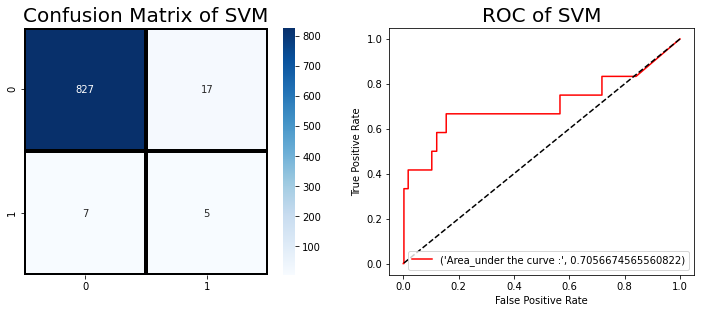

In [86]:
svm1 = plotsummary(svm_pred, 'SVM', svm_prob)

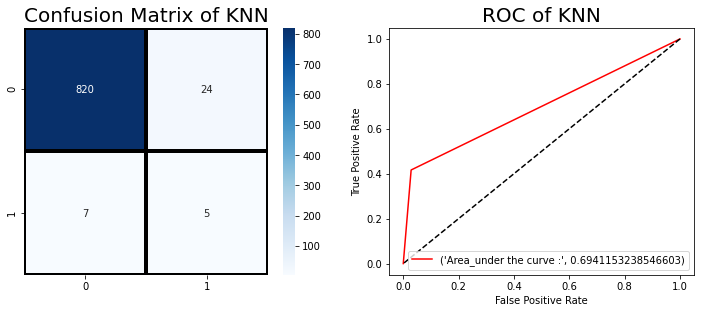

In [87]:
knn1 = plotsummary(knn_pred, 'KNN', knn_prob)

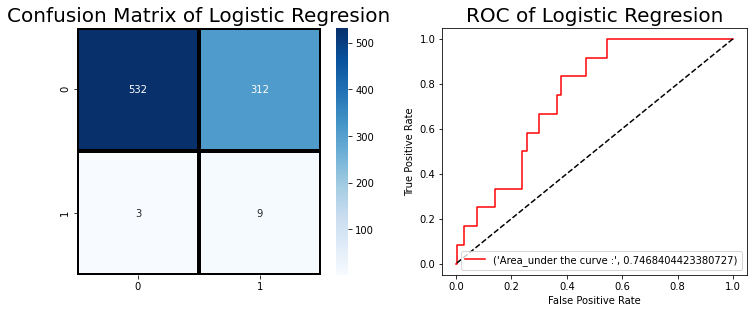

In [88]:
lr1 = plotsummary(lr_pred, 'Logistic Regresion', lr_prob)

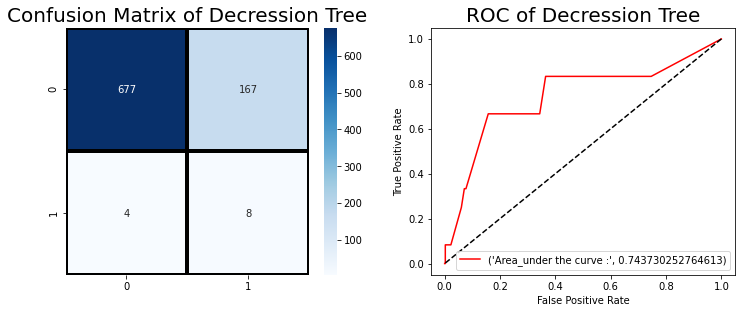

In [89]:
ds1 = plotsummary(ds_pred, 'Decression Tree', ds_prob)

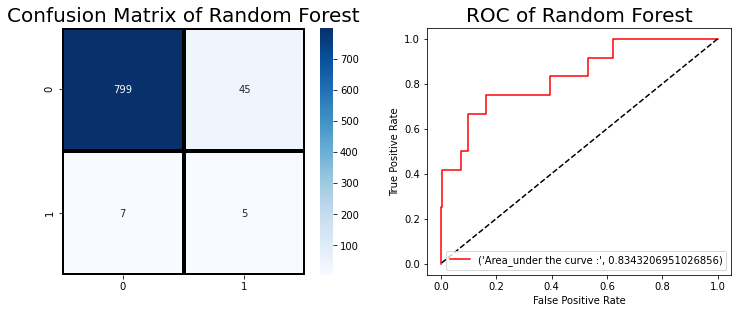

In [90]:
rf1 = plotsummary(rf_pred, 'Random Forest', rf_prob)

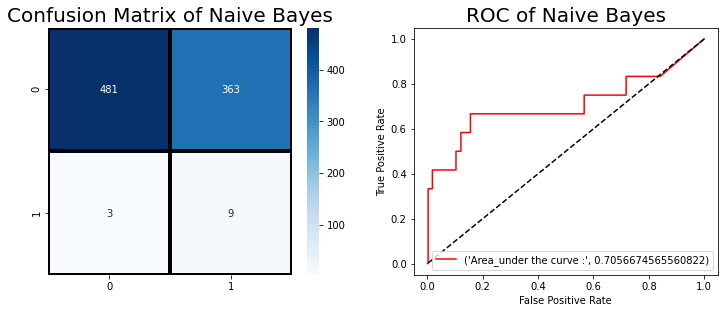

In [92]:
nb1 = plotsummary(nb_pred, 'Naive Bayes', svm_prob)

### UnderSampling

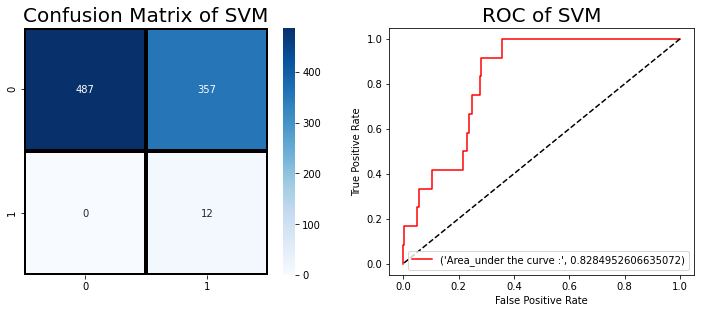

In [93]:
svm2 = plotsummary(svm_pred2, 'SVM', svm_prob2)

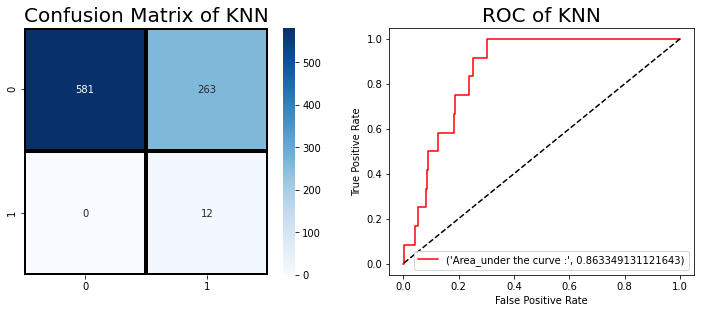

In [94]:
knn2 = plotsummary(knn_pred2, 'KNN', knn_prob2)

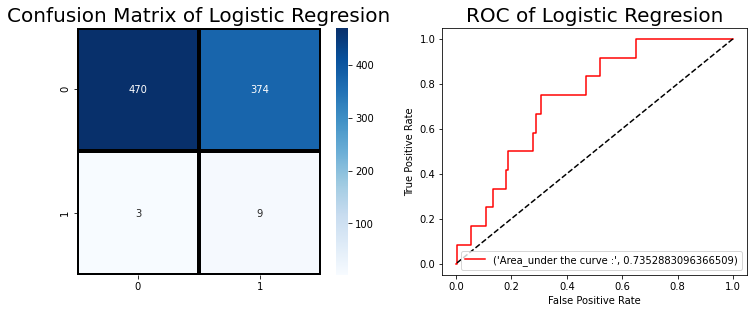

In [95]:
lr2 = plotsummary(lr_pred2, 'Logistic Regresion', lr_prob2)

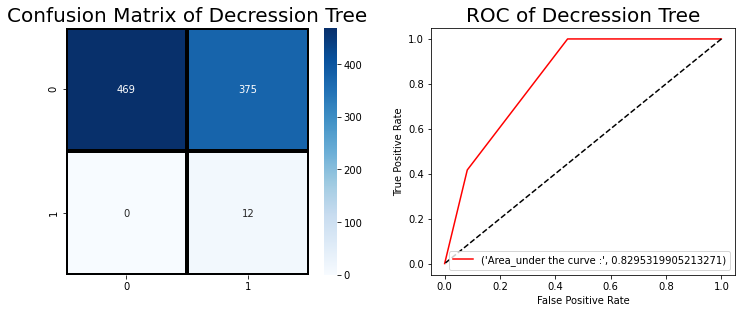

In [96]:
ds2 = plotsummary(ds_pred2, 'Decression Tree', ds_prob2)

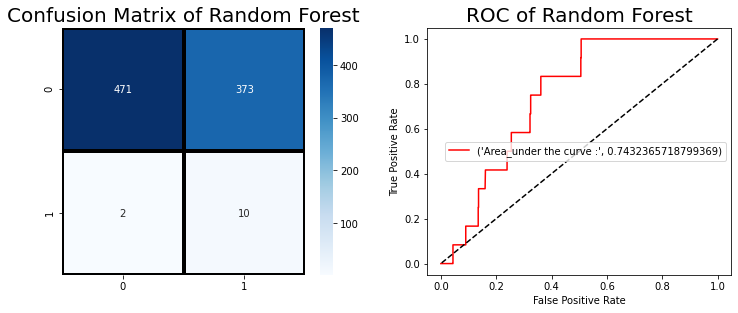

In [97]:
rf2 = plotsummary(rf_pred2, 'Random Forest', rf_prob2)

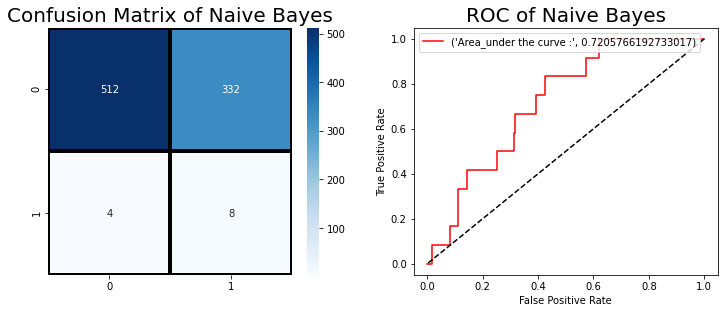

In [98]:
nb2 = plotsummary(nb_pred2, 'Naive Bayes', nb_prob2)

## Results Tables

### Oversampling

In [99]:
table1 = pd.DataFrame([svm_table1,knn_table1,lr_table1,ds_table1,rf_table1,nb_table1])
table1.columns = ['Sensitivity',
               'Specificity', 
               'False positive rate',
               'False negative rate', 
               'False Discovery rate',
               'Overall accuracy']
table1['Method'] = ['SVM','KNN','Logistic Regression',
                   'Decision Tree','Random Forest',
                  'Naive Bayes']
table1['ROC'] = [svm1, knn1, lr1, ds1, rf1, nb1]
table1 = table1[['Method', 'Sensitivity',
               'Specificity', 
               'False positive rate',
               'False negative rate', 
               'False Discovery rate',
               'Overall accuracy','ROC']]

In [101]:
table1

,Method,Sensitivity,Specificity,False positive rate,False negative rate,False Discovery rate,Overall accuracy,ROC
0,SVM,0.227273,0.991607,0.008393,0.772727,0.583333,0.971963,0.705667
1,KNN,0.172414,0.991536,0.008464,0.827586,0.583333,0.963785,0.694115
2,Logistic Regression,0.028037,0.994393,0.005607,0.971963,0.250000,0.632009,0.746840
3,Decision Tree,0.045714,0.994126,0.005874,0.954286,0.333333,0.800234,0.743730
4,Random Forest,0.100000,0.991315,0.008685,0.900000,0.583333,0.939252,0.834321
5,Naive Bayes,0.024194,0.993802,0.006198,0.975806,0.250000,0.572430,0.705667


### Undersampling

In [102]:
table3 = pd.DataFrame([svm_table3,knn_table3,lr_table3,ds_table3,rf_table3,nb_table3])
table3.columns = ['Sensitivity',
                  'Specificity', 
                  'False positive rate',
                  'False negative rate', 
                  'False Discovery rate',
                  'Overall accuracy']
table3['Method'] = ['SVM','KNN','Logistic Regression',
                    'Decision Tree','Random Forest',
                    'Naive Bayes']
table3['ROC'] = [svm2, knn2, lr2, ds2, rf2, nb2]
table3 = table3[['Method', 'Sensitivity',
                 'Specificity', 
                 'False positive rate',
                 'False negative rate', 
                 'False Discovery rate',
                 'Overall accuracy','ROC']]

In [104]:
table3 

,Method,Sensitivity,Specificity,False positive rate,False negative rate,False Discovery rate,Overall accuracy,ROC
0,SVM,0.032520,1.000000,0.000000,0.967480,0.000000,0.582944,0.828495
1,KNN,0.043636,1.000000,0.000000,0.956364,0.000000,0.692757,0.863349
2,Logistic Regression,0.023499,0.993658,0.006342,0.976501,0.250000,0.559579,0.735288
3,Decision Tree,0.031008,1.000000,0.000000,0.968992,0.000000,0.561916,0.829532
4,Random Forest,0.026110,0.995772,0.004228,0.973890,0.166667,0.561916,0.743237
5,Naive Bayes,0.023529,0.992248,0.007752,0.976471,0.333333,0.607477,0.720577


### OverSampling-Inactive

In [105]:
table11 = pd.concat([svm_table2.iloc[0:1,[0,2]], knn_table2.iloc[0:1,[0,2]], 
           lr_table2.iloc[0:1,[0,2]],
           ds_table2.iloc[0:1,[0,2]],
           rf_table2.iloc[0:1,[0,2]],
           nb_table2.iloc[0:1,[0,2]]], axis=0)
table11.reset_index(drop = True)
table11['Method'] = ['SVM','KNN','Logistic Regression',
                   'Decision Tree','Random Forest',
                  'Naive Bayes']
table11 = table11[['Method', "precision",'f1-score']]                

### OverSampling-Active

In [106]:
table12 = pd.concat([svm_table2.iloc[1:2,[0,2]], knn_table2.iloc[1:2,[0,2]], 
           lr_table2.iloc[1:2,[0,2]],
           ds_table2.iloc[1:2,[0,2]],
           rf_table2.iloc[1:2,[0,2]],
           nb_table2.iloc[1:2,[0,2]]], axis=0)
table12.reset_index(drop = True)
table12['Method'] = ['SVM','KNN','Logistic Regression',
                   'Decision Tree','Random Forest',
                  'Naive Bayes']
table12 = table12[['Method', "precision",'f1-score']]     

### UnderSampling-Inactive

In [107]:
table21 = pd.concat([svm_table4.iloc[0:1,[0,2]], knn_table4.iloc[0:1,[0,2]], 
                     lr_table4.iloc[0:1,[0,2]],
                     ds_table4.iloc[0:1,[0,2]],
                     rf_table4.iloc[0:1,[0,2]],
                     nb_table4.iloc[0:1,[0,2]]], axis=0)
table21.reset_index(drop = True)
table21['Method'] = ['SVM','KNN','Logistic Regression',
                     'Decision Tree','Random Forest',
                     'Naive Bayes']
table21 = table21[['Method', "precision",'f1-score']]      

### UnderSampling-Active

In [108]:
table22 = pd.concat([svm_table4.iloc[1:2,[0,2]], knn_table4.iloc[1:2,[0,2]], 
                     lr_table4.iloc[1:2,[0,2]],
                     ds_table4.iloc[1:2,[0,2]],
                     rf_table4.iloc[1:2,[0,2]],
                     nb_table4.iloc[1:2,[0,2]]], axis=0)
table22.reset_index(drop = True)
table22['Method'] = ['SVM','KNN','Logistic Regression',
                     'Decision Tree','Random Forest',
                     'Naive Bayes']
table22 = table22[['Method', "precision",'f1-score']] 

Oversampling - Inactive

In [109]:
table11

,Method,precision,f1-score
0,SVM,0.991607,0.985697
0,KNN,0.991536,0.981448
0,Logistic Regression,0.994393,0.771574
0,Decision Tree,0.994126,0.887869
0,Random Forest,0.991315,0.968485
0,Naive Bayes,0.993802,0.724398


Oversampling - Active

In [114]:
table12

,Method,precision,f1-score
1,SVM,0.227273,0.294118
1,KNN,0.172414,0.243902
1,Logistic Regression,0.028037,0.054054
1,Decision Tree,0.045714,0.085561
1,Random Forest,0.100000,0.161290
1,Naive Bayes,0.024194,0.046875


Undersampling - Inactive

In [115]:
table21

,Method,precision,f1-score
0,SVM,1.000000,0.731781
0,KNN,1.000000,0.815439
0,Logistic Regression,0.993658,0.713743
0,Decision Tree,1.000000,0.714395
0,Random Forest,0.995772,0.715262
0,Naive Bayes,0.992248,0.752941


Undersampling - Active

In [116]:
table22

,Method,precision,f1-score
1,SVM,0.032520,0.062992
1,KNN,0.043636,0.083624
1,Logistic Regression,0.023499,0.045570
1,Decision Tree,0.031008,0.060150
1,Random Forest,0.026110,0.050633
1,Naive Bayes,0.023529,0.045455
